In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [26]:
data=pd.read_csv(r'C:\Users\USER\Maindata.csv')

In [27]:
data.head()

,Gender,Time(hours),Previous cycle,No of stooling per day,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Symptom 6,Symptom 7,Symptom 8,Symptom 9,Symptom 10,Symptom 11,Symptom 12,Symptom 13,Diagnosis
0,Male,72.0,NaN,5.0,ABDOMINAL PAIN,ABDOMINAL PAINS,WATERY FAECES,NAUSEA,VOMITING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIARRHEA
1,Female,72.0,NaN,8.0,BLOOD IN STOOL,PERSISTENT VOMITING,STOMACHE ACHE,WEIGHT LOSS,DEHYDRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIARRHEA
2,Male,NaN,NaN,NaN,FEVER,HEADACHE,NAUSEA,CHILLS,CHILLS,EXCESSIVE SWEATING,DIARRHEA,GENERALLY FEELING UNWELL,ANAEMIA,NaN,NaN,NaN,NaN,MALARIA
3,Female,24.0,28.0,NaN,BLOOD FLOW FROM VAGINA,MOOD SWINGS,TROUBLE SLEEPING,FOOD CRAVINGS,CRAMPS IN LOWER ABDOMEN,NaN,CRAMPS IN LOWER BACK,BLOATING,BREAST TENDERNESS,ACNE,NaN,NaN,NaN,MENSTURATION
4,Male,NaN,NaN,NaN,FEVER,HEADACHE,NAUSEA,CHILLS,CHILLS,EXCESSIVE SWEATING,DIARRHEA,GENERALLY FEELING UNWELL,ANAEMIA,NaN,NaN,NaN,NaN,MALARIA


In [28]:
data[['Time(hours)', 'Previous cycle', 'No of stooling per day']]=data[[ 'Time(hours)', 'Previous cycle', 'No of stooling per day']].fillna(0)

In [29]:
data.head()

,Gender,Time(hours),Previous cycle,No of stooling per day,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Symptom 6,Symptom 7,Symptom 8,Symptom 9,Symptom 10,Symptom 11,Symptom 12,Symptom 13,Diagnosis
0,Male,72.0,0.0,5.0,ABDOMINAL PAIN,ABDOMINAL PAINS,WATERY FAECES,NAUSEA,VOMITING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIARRHEA
1,Female,72.0,0.0,8.0,BLOOD IN STOOL,PERSISTENT VOMITING,STOMACHE ACHE,WEIGHT LOSS,DEHYDRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIARRHEA
2,Male,0.0,0.0,0.0,FEVER,HEADACHE,NAUSEA,CHILLS,CHILLS,EXCESSIVE SWEATING,DIARRHEA,GENERALLY FEELING UNWELL,ANAEMIA,NaN,NaN,NaN,NaN,MALARIA
3,Female,24.0,28.0,0.0,BLOOD FLOW FROM VAGINA,MOOD SWINGS,TROUBLE SLEEPING,FOOD CRAVINGS,CRAMPS IN LOWER ABDOMEN,NaN,CRAMPS IN LOWER BACK,BLOATING,BREAST TENDERNESS,ACNE,NaN,NaN,NaN,MENSTURATION
4,Male,0.0,0.0,0.0,FEVER,HEADACHE,NAUSEA,CHILLS,CHILLS,EXCESSIVE SWEATING,DIARRHEA,GENERALLY FEELING UNWELL,ANAEMIA,NaN,NaN,NaN,NaN,MALARIA


In [30]:
data=data.fillna(100)

In [31]:
data.head()

,Gender,Time(hours),Previous cycle,No of stooling per day,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Symptom 6,Symptom 7,Symptom 8,Symptom 9,Symptom 10,Symptom 11,Symptom 12,Symptom 13,Diagnosis
0,Male,72.0,0.0,5.0,ABDOMINAL PAIN,ABDOMINAL PAINS,WATERY FAECES,NAUSEA,VOMITING,100,100,100,100,100,100,100,100,DIARRHEA
1,Female,72.0,0.0,8.0,BLOOD IN STOOL,PERSISTENT VOMITING,STOMACHE ACHE,WEIGHT LOSS,DEHYDRATION,100,100,100,100,100,100,100,100,DIARRHEA
2,Male,0.0,0.0,0.0,FEVER,HEADACHE,NAUSEA,CHILLS,CHILLS,EXCESSIVE SWEATING,DIARRHEA,GENERALLY FEELING UNWELL,ANAEMIA,100,100,100,100,MALARIA
3,Female,24.0,28.0,0.0,BLOOD FLOW FROM VAGINA,MOOD SWINGS,TROUBLE SLEEPING,FOOD CRAVINGS,CRAMPS IN LOWER ABDOMEN,100,CRAMPS IN LOWER BACK,BLOATING,BREAST TENDERNESS,ACNE,100,100,100,MENSTURATION
4,Male,0.0,0.0,0.0,FEVER,HEADACHE,NAUSEA,CHILLS,CHILLS,EXCESSIVE SWEATING,DIARRHEA,GENERALLY FEELING UNWELL,ANAEMIA,100,100,100,100,MALARIA


In [32]:
data.columns

Index(['Gender', 'Time(hours)', 'Previous cycle', 'No of stooling per day',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Symptom 6', 'Symptom 7', 'Symptom 8', 'Symptom 9', 'Symptom 10',
       'Symptom 11', 'Symptom 12', 'Symptom 13', 'Diagnosis'],
      dtype='object')

In [33]:
cl= ['Gender','Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Symptom 6', 'Symptom 7', 'Symptom 8', 'Symptom 9', 'Symptom 10',
       'Symptom 11', 'Symptom 12', 'Symptom 13', 'Diagnosis']
for d in cl:
    print(data[d].value_counts())

Female    634
Male      366
Name: Gender, dtype: int64
FEVER                     310
ABDOMINAL PAIN            148
BREAST SWELLING            38
PELVIC PAIN                37
BREAKOUTS                  37
WATERY STOOLS              37
ANXIETY                    37
TENDER BREASTS             37
FEELING SICK               37
FEELING BLOATED            37
BLOOD IN STOOL             37
STOMACH PAIN               37
NAUSA                      37
DARK URINE                 37
BLOOD FLOW FROM VAGINA     37
HEADACHE                   30
POOR APPETITE              30
Name: Symptom 1, dtype: int64
CHILLS                       218
ABDOMINAL PAINS              148
BLOATING                     111
HEADACHE                      92
MOOD SWINGS                   74
TENSION                       38
PERSISTENT VOMITING           37
RAPID HEART RATE              37
BREAKOUTS                     37
LOWER BACK PAIN               37
VOMITING                      37
JOINT PAIN                    37
BREAST AR

In [34]:
cl= ['Gender','Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Symptom 6', 'Symptom 7', 'Symptom 8', 'Symptom 9', 'Symptom 10',
       'Symptom 11', 'Symptom 12', 'Symptom 13', 'Diagnosis']
for d in cl:
    data[d]=data[d].astype('category').cat.codes
    print(data[d].value_counts())
    

0    634
1    366
Name: Gender, dtype: int64
9     310
0     148
5      38
12     37
4      37
16     37
1      37
15     37
8      37
7      37
3      37
14     37
11     37
6      37
2      37
10     30
13     30
Name: Symptom 1, dtype: int64
4     218
0     148
1     111
7      92
10     74
13     38
11     37
12     37
2      37
9      37
14     37
8      37
3      37
5      30
6      30
Name: Symptom 2, dtype: int64
8     134
5     104
10     97
3      97
0      75
13     62
17     37
6      37
16     37
9      37
4      37
11     37
12     37
2      37
14     37
15     37
1      31
7      30
Name: Symptom 3, dtype: int64
10    165
8      74
6      74
4      74
17     74
16     67
2      61
15     61
1      38
11     37
3      37
13     37
9      37
0      37
5      37
14     30
12     30
7      30
Name: Symptom 4, dtype: int64
16    128
11     74
3      74
9      74
5      61
10     61
17     60
6      60
14     38
2      37
0      37
1      37
18     37
12     37
15     37
4    

In [35]:
data.head()

,Gender,Time(hours),Previous cycle,No of stooling per day,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Symptom 6,Symptom 7,Symptom 8,Symptom 9,Symptom 10,Symptom 11,Symptom 12,Symptom 13,Diagnosis
0,1,72.0,0.0,5.0,0,0,17,13,18,0,0,0,0,0,0,0,0,0
1,0,72.0,0.0,8.0,3,11,12,17,9,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,9,7,10,2,6,9,7,7,1,0,0,0,0,1
3,0,24.0,28.0,0.0,2,10,15,8,8,0,6,2,3,1,0,0,0,2
4,1,0.0,0.0,0.0,9,7,10,2,6,9,7,7,1,0,0,0,0,1


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  1000 non-null   int8   
 1   Time(hours)             1000 non-null   float64
 2   Previous cycle          1000 non-null   float64
 3   No of stooling per day  1000 non-null   float64
 4   Symptom 1               1000 non-null   int8   
 5   Symptom 2               1000 non-null   int8   
 6   Symptom 3               1000 non-null   int8   
 7   Symptom 4               1000 non-null   int8   
 8   Symptom 5               1000 non-null   int8   
 9   Symptom 6               1000 non-null   int8   
 10  Symptom 7               1000 non-null   int8   
 11  Symptom 8               1000 non-null   int8   
 12  Symptom 9               1000 non-null   int8   
 13  Symptom 10              1000 non-null   int8   
 14  Symptom 11              1000 non-null   i

In [36]:
x=data.drop('Diagnosis',axis=1)
y=data['Diagnosis']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
y_train=keras.utils.to_categorical(y_train,num_classes=3)
y_test=keras.utils.to_categorical(y_test,num_classes=3)

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K

In [40]:
model=Sequential()
model.add(Dense(64,activation="relu",input_dim=17))
model.add(Dropout(0.5))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3,activation="softmax"))

In [41]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [42]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/100
25/25 [==============================] - 1s 17ms/step - loss: 24.3062 - accuracy: 0.3625 - val_loss: 6.6600 - val_accuracy: 0.4800
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 15.8390 - accuracy: 0.4025 - val_loss: 6.4059 - val_accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 11.9126 - accuracy: 0.4825 - val_loss: 3.3927 - val_accuracy: 0.7600
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 9.6455 - accuracy: 0.5100 - val_loss: 3.4939 - val_accuracy: 0.8200
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 6.7594 - accuracy: 0.5938 - val_loss: 1.5364 - val_accuracy: 0.8800
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 6.1061 - accuracy: 0.6037 - val_loss: 1.7718 - val_accuracy: 0.8600
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 5.9692 - accuracy: 0.6263 - val_loss: 0.8853 - val_accuracy: 0.8800
Epoch 8/1

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,confusion_matrix

In [54]:
y_pred=model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [55]:
y_pred

array([[1.00000000e+00, 3.02521951e-14, 2.93481332e-17],
       [7.43888898e-15, 6.30229714e-14, 1.00000000e+00],
       [1.10759830e-11, 9.05569716e-11, 1.00000000e+00],
       [1.00000000e+00, 4.75039452e-11, 1.49293569e-13],
       [1.00000000e+00, 7.52969687e-10, 7.45227447e-13],
       [5.17847137e-12, 1.00000000e+00, 2.18729521e-14],
       [4.59301751e-04, 9.99540687e-01, 5.87361937e-09],
       [9.99999642e-01, 3.07237741e-07, 2.34094168e-11],
       [1.29940989e-03, 1.11279907e-02, 9.87572670e-01],
       [5.17847137e-12, 1.00000000e+00, 2.18729521e-14],
       [2.12437753e-03, 9.97874975e-01, 5.77231617e-07],
       [1.00000000e+00, 5.53021935e-16, 1.04906826e-20],
       [2.12437753e-03, 9.97874975e-01, 5.77231617e-07],
       [1.13273533e-02, 9.88666534e-01, 6.18673630e-06],
       [3.67489506e-16, 4.41636626e-15, 1.00000000e+00],
       [1.00000000e+00, 4.75039452e-11, 1.49293569e-13],
       [7.72897329e-04, 9.99226809e-01, 2.71301730e-07],
       [2.12437753e-03, 9.97874

In [45]:
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)

In [53]:
y_pred

array([0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1,
       2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0,
       2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2,
       2, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2,
       1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1,
       0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0,
       2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0,
       1, 0], dtype=int64)

In [52]:
y_test.shape

(200,)

In [46]:
result=confusion_matrix(y_test,y_pred,normalize='pred')

In [47]:
result

array([[1.        , 0.10588235, 0.        ],
       [0.        , 0.89411765, 0.        ],
       [0.        , 0.        , 1.        ]])

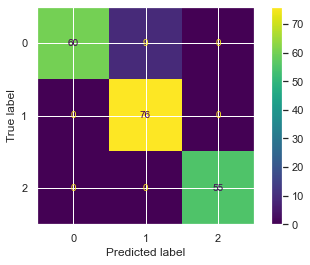

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [49]:
save_path="./diagmodel.h5"
model.save(save_path)
model=keras.models.load_model(save_path)